In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ERG-131] Homework 4: Visualization
<br>

## Table of Contents
1 - [Plotting Basics](#basics)<br>
2 - [The Data](#data)<br>
3 - [Visual EDA - Histograms, KDEs, Box Plots, Violin Plots](#eda)<br>
4 - [Scatter Plots](#scatter)<br>
5 - [Project](#project)<br>


### Introduction <a id='intro'></a>
So far we have learned how to use numpy and pandas to manipulate and explore datasets. Now, we are going to learn how to use Python libraries matplotlib and seaborn to explore datasets visually.
In this homework, we will explore:
+ How to plot and customize graphs with matplotlib and seaborn
+ How to visualize distributions with histograms, kernel density estimators, box-and-whisker plots, and violin plots, and how to determine when to use which type of plot
+ How to create basic scatter plots
+ Analyze and interpret plots
+ How to apply best practices when creating visualizations, including labeling titles, axes, legends, adjusting the font size, and choosing a color palette


**Dependencies:**

In [2]:
import pandas as pd
import numpy as np
import datetime
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 


----

## Section 1: Plotting Basics <a id='basics'></a>

Before we work with the data, we are going to go over some basic plotting basics using trig functions. Take a look at the sample code below that plots a sine wave.

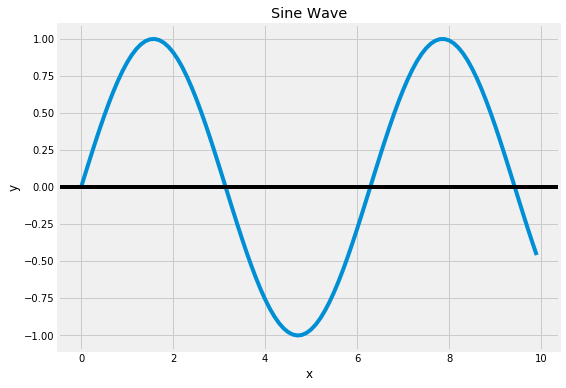

In [3]:
# Sample code to plot a sine wave
x = np.arange(0, 10, 0.1) # This generates a set of numbers to plug into the sine function
y = np.sin(x) # Outputs y values from the sine function
plt.figure(figsize=(8,6)) #a
plt.plot(x, y) #b
plt.title("Sine Wave") #c
plt.xlabel("x") #d
plt.ylabel("y") #e
plt.axhline(y=0, color="k") #f
plt.grid(True, which='both') #g
plt.show()

**Question 1.1:** Certain lines of codes are denoted by a comment, like "#a". Label what each commented line does, replacing the '...'. Feel free to modify the sample code to see what changes. You can also look up matplotlib.pyplot documentation [here](https://matplotlib.org/api/pyplot_summary.html): <br>
**a.** ... <br>
**b.** ... <br>
**c.** ... <br>
**d.** ... <br>
**e.** ... <br>
**f.** ... <br>
**g.** ... <br>

In [4]:
# POSSIBLE SOLUTION
# 1a. Changes plot size
# 1b. Plots y vs. x as lines (by default)
# 1c. Adds a title to the plot
# 1d. Labels the x-axis
# 1e. Labels the y-axis
# 1f. Draws the a horizontal line on the x-axis
# 1g. Turns axis grids on

Next, run and observe the code below.

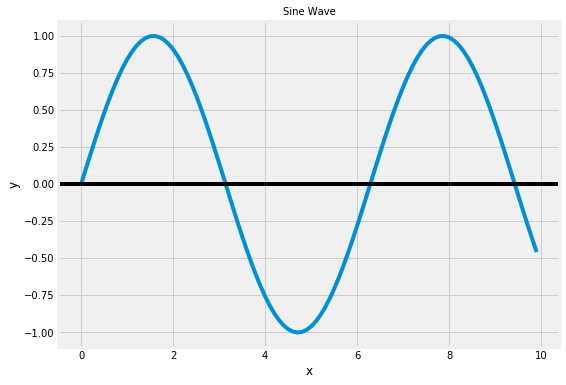

In [5]:
x = np.arange(0, 10, 0.1)
y = np.sin(x) 
plt.figure(figsize=(8,6))
plt.plot(x, y) 
plt.title("Sine Wave", fontsize=10) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k") 
plt.grid(True, which='both') 
plt.show()

**Question 1.2:** There is one difference between this plot and the first one. What is the difference, and where in the code produces it? Which plot is better?

*Your answer here*<br>
Possible answer: The title is much smaller. In the code, plt.title() contains an additional argument, fontsize=10, which makes the title smaller, even smaller than the axes labels. The original plot is better because the title should be bigger than the axes labels (other answers accepted).

**Question 1.3:** In some cases, it would be better to create multiple subplots at once rather than in succession, especially if we want to compare the graphs side-by-side. Take a look at the code below. Change the ellipses so that a sine wave, a cosine wave, and a tangent wave are shown horizontally side-by-side - make sure to change the appropriate arguments to [`plt.subplot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html), `y = `, and `plt.title()`.

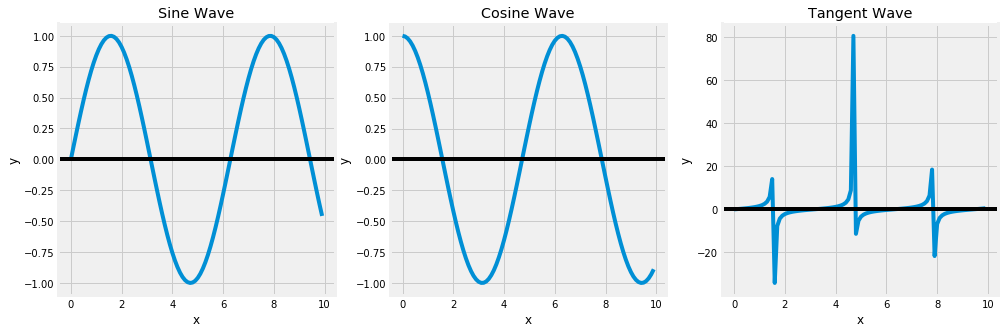

In [6]:
# solution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)

x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y) 
plt.title("Sine Wave") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k") 
plt.grid(True, which='both') 

plt.subplot(1, 3, 2)

x = np.arange(0, 10, 0.1)
y = np.cos(x)
plt.plot(x, y) 
plt.title("Cosine Wave") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k") 
plt.grid(True, which='both') 

plt.subplot(1, 3, 3)

x = np.arange(0, 10, 0.1)
y = np.tan(x)
plt.plot(x, y) 
plt.title("Tangent Wave") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k") 
plt.grid(True, which='both') 

plt.show()

<br>

----
## Section 2: The Data<a id='data'></a>

In this notebook, you'll be revisiting data from the California Independent System Operator (CAISO) on energy demand and supply.<br>

For this assignment, we've downloaded data from CAISO's ["Today's Outlook" page](http://www.caiso.com/TodaysOutlook/Pages/default.aspx). You can take a look around the page and visit its different tabs to see how CAISO visualizes its daily data.<br>

To start off, we're going to make use of the function `CAISOrenewables()` that Duncan wrote for the `CAISO_data_pull.ipynb` file in lecture 2. The function is defined below.

In [7]:
def CAISOrenewables(year, month, start_day, end_day, production = False, matrix = False):
    """Scrape CAISO's daily renewable watch .txt files and 
    convert to a DataFrame or Numpy record array. Will only scrape
    a range of days in a given month.
    
    Keyword arguments:
    Year -- year of the date to scrape
    Month -- Month of date to scrape
    start_day -- starting day of month to scrape
    end_day -- ending day to scrape
    production -- If False, will collect hourly breakdown of renewable resources.
                  If True, will scrape hourly breakdown of total production by resource type.
    matrix -- If False, function will return a Pandas DataFrame
              If True, will return numpy recarray
    """
    base_url = 'http://content.caiso.com/green/renewrpt/'
    tail = '_DailyRenewablesWatch.txt'
    
    rv = pd.DataFrame()
    
    for day in range(start_day, end_day + 1):
        #format date and URL to pull
        if month < 10:
            str_month = '0' + str(month)
        else:
            str_month = str(month)
        if day < 10:
            str_day = '0'+ str(day)
        else:
            str_day = str(day)
            
        str_m_day = str_month + str_day
        url = base_url + str(year) + str_m_day + tail

        #Write scraped file to drive
        caiso_data = requests.get(url).text
        txt_filename = str(year) +str_m_day + '.txt'
        csv_filename = str(year) + str_m_day + '.csv'
    
        with open(txt_filename, 'w') as f:
            f.write(str(caiso_data))
    
        #Convert the .txt file to a csv.
        with open(txt_filename) as txtfile, open(csv_filename,'w') as new_csv:
            for line in txtfile: 
                new_csv.write(line.replace('\t',','))

        #Get day of year for dataframe index
        date = datetime.date(year, month, day)
    
        #Load data to dataframe.
        data = pd.read_csv(csv_filename, delimiter='\t')
        
        if not production:
            data = data.iloc[range(0, 25)]
        else:
            data = data.iloc[range(28, 53)].reset_index(drop=True)
    
        #Get column names
        columns = [i for i in np.array2string(data.iloc[0].values).split(',') if len(i)>3]
    
        #Grab first row of data to put in a dictionary then append the rest.
        first_row = [[int(i)] for i in np.array2string(data.iloc[1].values).split(',') if i.isdigit()]
        df_data = dict(zip(columns, first_row))
    
        #Do the same for the rest of the rows
        for row in range(2, data.shape[0]):
            vals = [int(i) for i in np.array2string(data.iloc[row].values).split(',') if i.isdigit()]
            for item in range(len(columns)):
                df_data[columns[item]].append(vals[item])
    
        #create DataFrame with collected data
        d_df = pd.DataFrame(df_data, [date]*24)[columns]
        rv = rv.append(d_df)
        
        os.remove(txt_filename)
        os.remove(csv_filename)
        
    if matrix:
        return rv.to_records(index=True)
    
    return rv

### Question 2.1
The function `CAISOrenewables()` can only pull data from start and end dates in the same month - for example, running:
```python
CAISOrenewables(2018,1,1,31)
```
will output all of the renewable energy generation data for the whole month of January 2018. We want to get data for the whole year rather than just one month. In the cell below, write code that loops through every month of the year 2018, gets all of the data for that month, and generates a dataframe `renewables_2018` that contains a record for every hour of every day of 2018 (24 x 365 = 8760, so `renewables_2018` should have 8760 rows).<br>
There are many ways to approach this, and you should use the method that's most intuitive to you. One approach would involve initializing an empty dataframe using `pd.DataFrame([])`, and then using `pd.concat()` to add data from each month.<br>
No matter what approach you take, it'll probably take a few minutes for your code to run, so you can try first writing a test loop for two months and then changing it to grab data for all the months once you're sure it works.

In [8]:
# solution - if you ended up using the CAISOrenewables() function, you can uncomment this and try it out

# Read in renewable generation data
# renewables_2018 = pd.DataFrame([])
# days = [31,28,31,30,31,30,31,31,30,31,30,31] # number of days in each month
# for month in range(1,13): # loop through months
#     renewables_2018 = pd.concat([renewables_2018, CAISOrenewables(2018,month,1,days[month-1])])

In [9]:
# solution - if you ended up reading the data from the file

renewables_2018 = pd.read_csv("data/caiso_2018.csv", index_col = 0)
renewables_2018.index = pd.to_datetime(renewables_2018.index)

In [10]:
renewables_2018.head()

,Hour,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
Date,,,,,,,,
2018-01-01,1,975,304,214,299,236,0,0
2018-01-01,2,976,304,215,301,277,0,0
2018-01-01,3,975,304,216,301,128,0,0
2018-01-01,4,974,303,215,301,82,0,0
2018-01-01,5,974,305,215,301,127,0,0


In [11]:
renewables_2018.shape

(8760, 8)

<br>

----

## Section 3: Visual EDA - Histograms, KDEs, Box Plots, Violin Plots <a id='eda'></a>

There are four different types of plots that are commonly used to visualize the distribution of data: histograms, kernel density estimator plots, box-and-whisker plots, and violin plots. We're going to plot all four types and discuss the differences between them. <br>

For this homework assignment, we're going to look specifically at solar PV generation.

### Histograms

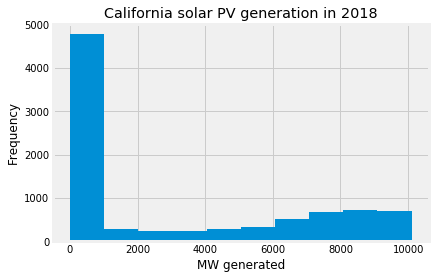

In [12]:
# Run this cell to plot a histogram of solar PV generation in 2018
plt.hist(renewables_2018["SOLAR PV"])
plt.title("California solar PV generation in 2018")
plt.ylabel("Frequency")
plt.xlabel("MW generated")
plt.show()

### Question 3.1
Our histogram isn't super interesting because we know that solar PV generation is going to be 0 throughout the night. It might be more informative to look at the distribution of solar PV generation at different times - specifically, at the times when generation is non-zero.<br>

Let's start by getting the hours for which we have year-round data for Solar PV - i.e. the hours when solar PV generation is non-zero for every day of the year. If you run the cell below, you can select only the records in `renewables_2018` where solar generation is non-zero and group them by hour. Let's focus on the hours of the day where we get 365 days of non-zero data - i.e. the hours when there is solar generation every day of the year.<br>

In the next cell, you'll find code that tells you how many days have non-zero PV production per hour.

In [13]:
# run this cell to see a count of non-zero solar PV values by hour
renewables_2018.loc[renewables_2018["SOLAR PV"] != 0, 
                    ["Hour", "SOLAR PV"]].groupby("Hour").count()

,SOLAR PV
Hour,
1,7
2,4
3,4
4,2
5,2
6,9
7,247
8,365
9,365


Now, in the empty cell below, create a plot with 10 subplots.  Each subplot should the histogram distribution for each of the ten hours in the vector above that had PV output for all 365 days of the year. Add x-axis and y-axis labels and a title to each subplot.<br>

One approach to this question would involve initializing the figure area with `plt.figure()`, and then looping through the months to add histogram subplots using `plt.subplot()`. Your final figure might look a little cramped - you can use `plt.tight_layout()` at the end to avoid any overlapping subplots.

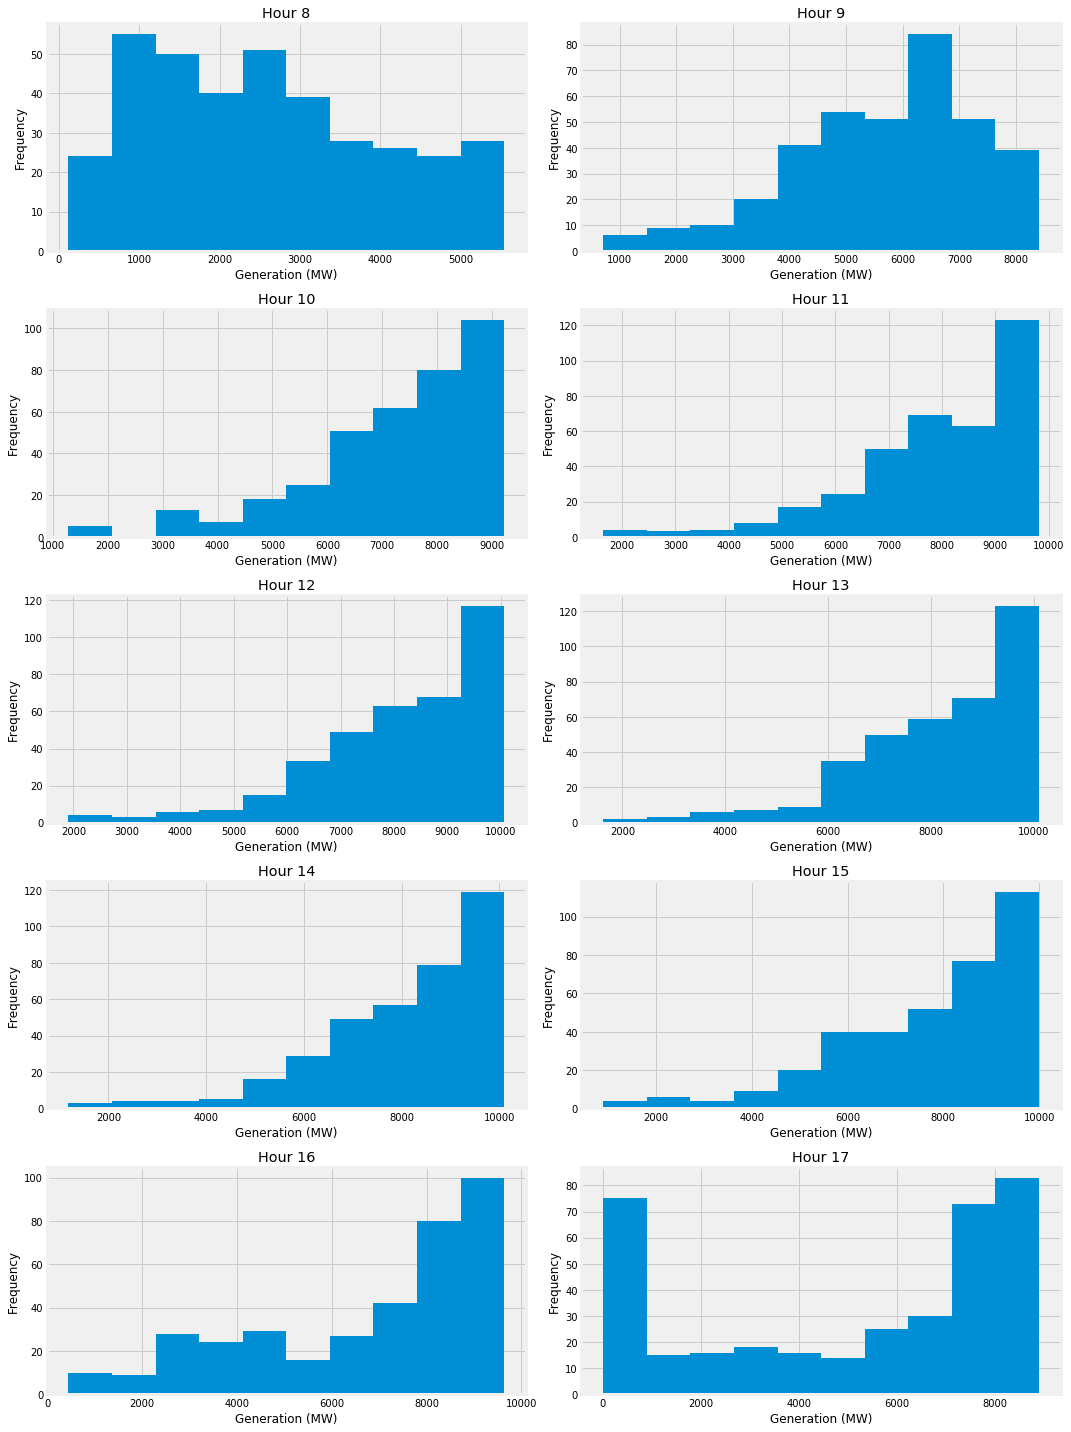

In [14]:
# solution
plt.figure(figsize=(15, 20))

for i in range(8,18):
    plt.subplot(5, 2, i-7)
    plt.hist(renewables_2018[renewables_2018["Hour"] == i]["SOLAR PV"])
    plt.title("Hour " + str(i))
    plt.xlabel("Generation (MW)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Question 3.2
What can you observe from the histograms?  Provide at least three observations that contrast the plots.

*Your answer here*

In [15]:
# Possible answers
# 1. the highest production level is the most likely for mid-day hours
# 2. Hour 17 has a significant fraction of hours in the lowest bin.  Might be the result of a daylight savings time shift
# 3. Hour 8 is the only hour for which production is close to uniformly distributed.

### Question 3.3
Unless you are ahead of the curve and already coded this into your plots, you probably have histograms that have different x and y axis scales. Re-enter your code to generate the plots below, but this time call `plt.xlim()` and `plt.ylim()` in your for loop to give all the plots the same axis scales.

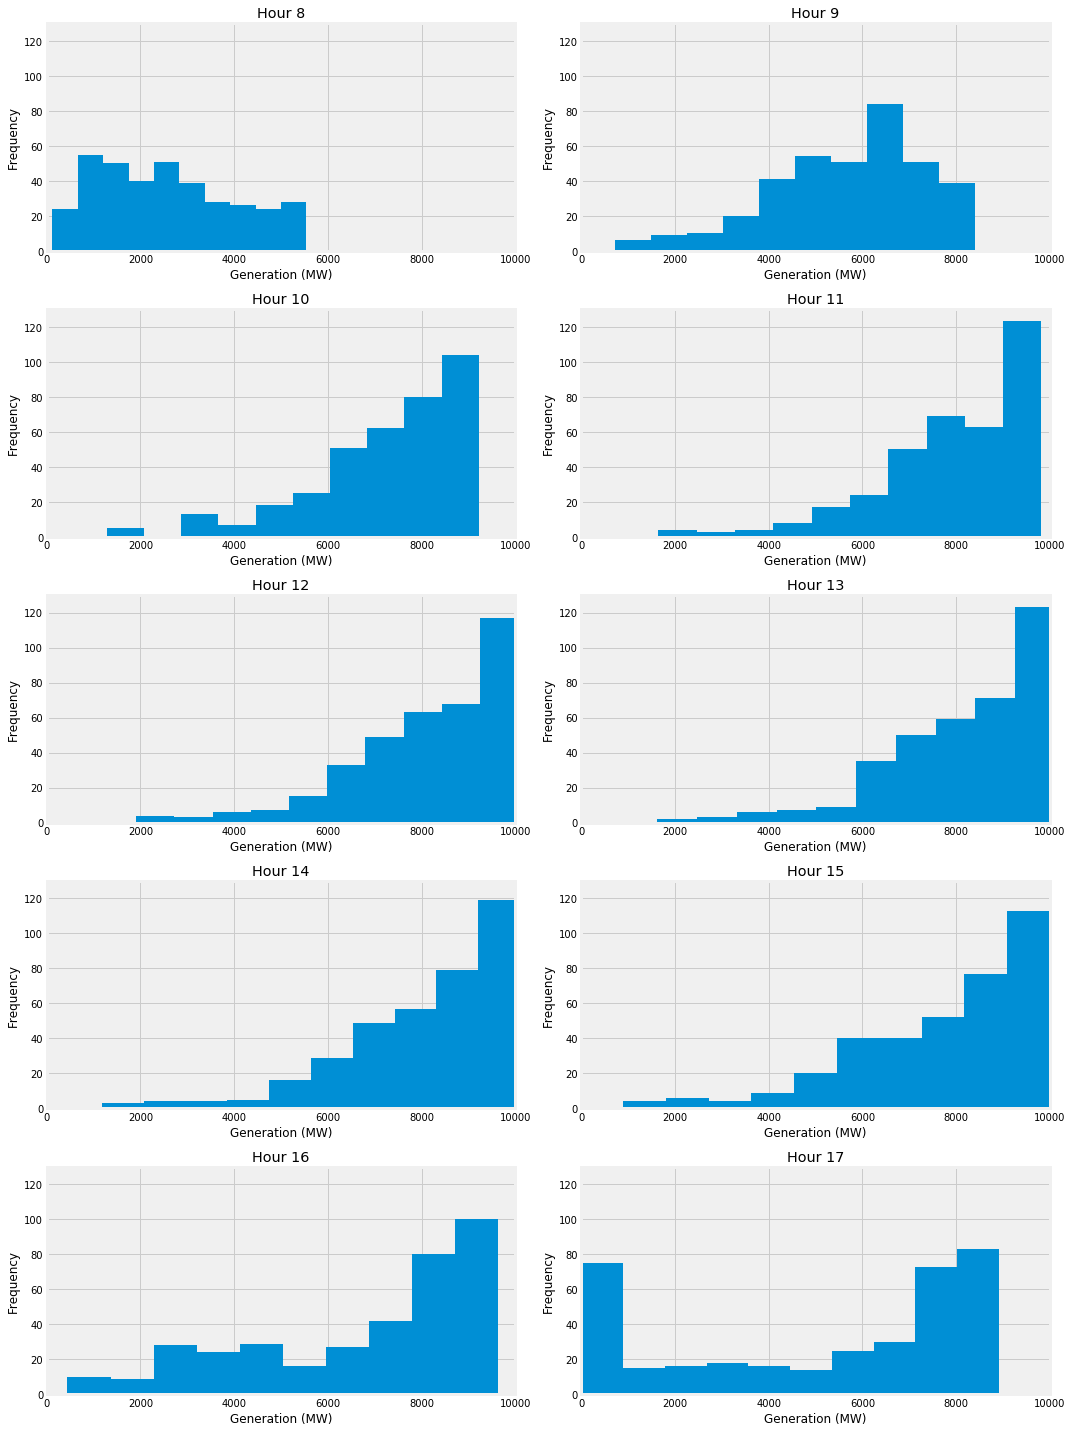

In [16]:
# solution
plt.figure(figsize=(15, 20))

for i in range(8,18):
    plt.subplot(5, 2, i-7)
    plt.hist(renewables_2018[renewables_2018["Hour"] == i]["SOLAR PV"])
    plt.title("Hour " + str(i))
    plt.xlabel("Generation (MW)")
    plt.ylabel("Frequency")
    plt.xlim(0,10000)
    plt.ylim(0,130)

plt.tight_layout()
plt.show()

### Question 3.4
Do you notice anything new when you re-scale the axes? Do the trends shown over the different hours make sense to you?  Provide two observations that are more noticeable here than in the prior plots.

*Your answer here*

In [17]:
# Possible answers
# 1. the maximum production is lower in the early and late hours
# 2. The minimum production is higher in the mid day hours

### Seaborn and KDEs
**Seaborn** is a Python data visualization library that is built on top of matplotlib. It offers a higher level of abstraction, and arguably more attractive-looking graphics.<br>

Below is a histogram plotted using seaborn. Because of its higher level of abstraction, seaborn can plot elements on a graph that would usually require extra calculation using our usual libraries (e.g., a linear regression line; or the kernel density estimation curve overlayed on the top of this histogram). A great option for plotting a univariate distribution of observations is seaborn [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html), which combines matplotlib histogram with seaborn kde and rugplot. 

Note that the KDE plot normalizes the data so that it is between 0 and 1. It also represents the distribution of a set of data, with [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother).

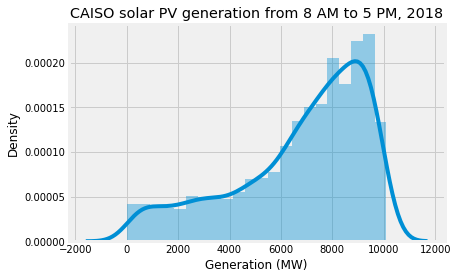

In [18]:
# Run this example seaborn plot
sns.distplot(renewables_2018[renewables_2018["Hour"].between(8,17, inclusive = True)]["SOLAR PV"])
plt.title("CAISO solar PV generation from 8 AM to 5 PM, 2018")
plt.xlabel("Generation (MW)")
plt.ylabel("Density")
plt.show()

### Question 3.5

The plot above gives us the histogram and KDEs for hours 8 AM to 5 PM, but as we know from earlier in the homework assignment, there's quite a bit of variation from hour to hour. Use sns.distplot() to plot only the KDEs (not the histograms) of solar PV generation for each hour where we have 365 non-zero data points. You should end up with 10 different curves (one for each hour from 8 AM to 5 PM) all on the same plot.

Make sure to include a legend, title, and axis labels. Consult the [documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html) if necessary.<br>

A for loop will be helpful here again - as with previous problems, you may want to use `plt.figure()` to establish your figure area, and then call `sns.distplot()` within a for loop.  

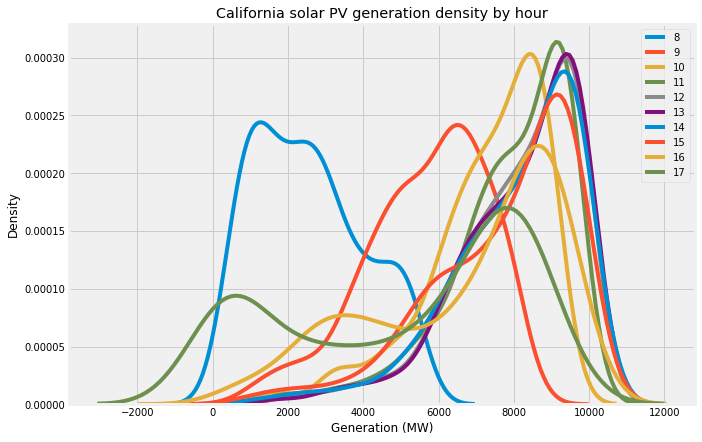

In [19]:
# SOLUTION
plt.figure(figsize=(10, 7))

for i in range(8,18):
    sns.distplot(renewables_2018[renewables_2018["Hour"] == i]["SOLAR PV"], 
                 hist=False, kde=True, label=i)

plt.legend()
plt.title("California solar PV generation density by hour")
plt.xlabel("Generation (MW)")
plt.ylabel("Density");

### Question 3.6

Several of the distributions have negative values on the left side of the support.  That's clearly not physical -- the data are all non-negative.  Why is this happening?  What could you do to reduce the problem?

*Your answer here*

Possible answer: the kernel is not constrained to positive values of the support.  So even though the data all sit in the positive half of the support, the kernels themselves can take on non-zero values in negative parts of the support. One could address the problem by reducing the bandwidth.

### Question 3.7
Do you observe anything new from this visualization that wasn't apparent when you looked at the histograms? How can this visualization be made better, or more informative?

*Your answer here*

Full marks given if students answer both questions (if they observe something new, and how the visualization can be improved).

### Question 3.8
The default color palette that seaborn used for our kernel density plot is a little confusing - it's hard to keep track of 10 different lines on one graph, especially since some of the colors are used more than once! One thing we can do to make the plot more digestible is to use a sequential color palette, so that each hour is plotted as a different shade of the same color.<br>

One way to get a sequential color palette in Python is to use the [`sns.cubehelix_palette()`](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html) function. The output of this function is an array of RGB values, each of which represents a different color on a sequential spectrum. If you run the code below, you'll get an array of 6 lists, each of which contains the RGB values for a different color. You can also try to modify the default arguments, like `start = `, that are outlined in the function documentation. If you run the second cell below, you can preview your color palette using `sns.palplot()`.<br>

In the empty code cell block below, define a palette using `sns.cubehelix_palette()` that contains a number of colors equal to the number of lines that you'll be plotting, and then modify your code for generating the KDE plots so that the color of your hour lines get darker as the hours increase. The result should be a plot with 10 KDE curves, each plotted in a different shade of the same color. To achieve this, you'll want to use the `color = ` argument within `sns.distplot()`.

In [20]:
# run this cell to generate a color palette and save the RGB values to test_palette
test_palette = sns.cubehelix_palette(6)
test_palette

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8559578605899612, 0.6418993116910497, 0.6754191211563135],
 [0.739734329496642, 0.4765280683170713, 0.5959617419736206],
 [0.57916573903086, 0.33934576125314425, 0.5219003947563425],
 [0.37894937987024996, 0.2224702044652721, 0.41140014301575434],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

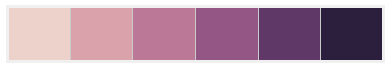

In [21]:
# run this cell to preview the colors in the palette you just defined, test_palette
sns.palplot(test_palette)

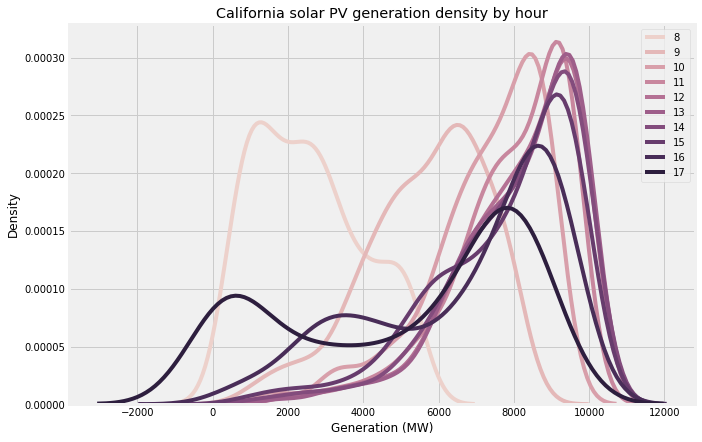

In [22]:
# SOLUTION
plt.figure(figsize=(10, 7))

palette = sns.cubehelix_palette(10)

for i in range(8,18):
    sns.distplot(renewables_2018[renewables_2018["Hour"] == i]["SOLAR PV"], 
                 hist=False, kde=True, label=i, color = palette[i-8])

plt.legend()
plt.title("California solar PV generation density by hour")
plt.xlabel("Generation (MW)")
plt.ylabel("Density");

### Question 3.9
Do you observe anything new from your latest KDE plot, with multiple hours and a sequential color palette, that wasn't as obvious from the histograms or the first KDE plot?

*Your answer here*

### Question 3.10

Why would it be advantageous to only plot the KDE instead of the histogram?

*Your answer here*

Possible answers: can layer multiple plots; can better capture continuity of data since it isn't binned

### Box Plots and Violin Plots

### Question 3.11:

Back to matplotlib! Using the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) for plt.boxplot(), plot the generation values for geothermal, small hydro, and wind energy over 2018 side by side. Make sure to add a title and label axes.<br>
*Hint*: if you want to input multiple columns of a Pandas dataframe to `plt.boxplot()`, you can use the syntax `plt.boxplot(df[["Column 1", "Column 2"]].values)`.<br>

*Note*: in the lab, we used the sns boxplot function; now we're trying the matplotlib one. Their syntax, especially when it comes to labelling axes, is a little bit different, but the documentation, previous examples, and the skeleton code below will guide you through labelling boxplots in matplotlib.

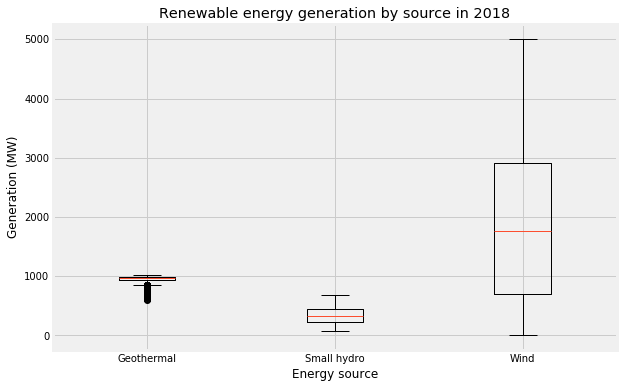

In [23]:
# solution
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot(renewables_2018[["GEOTHERMAL", "SMALL HYDRO", "WIND TOTAL"]].values)
ax.set_xticklabels(["Geothermal", "Small hydro", "Wind"])
plt.xlabel("Energy source")
plt.ylabel("Generation (MW)")
plt.title("Renewable energy generation by source in 2018")
plt.show()

### Question 3.12
What can you observe from the box plot above?

*Your answer here*

### Question 3.13
One thing we notice from our box plot is that the different energy sources (geothermal, small hydro, and wind) generate energy at completely different scales, since there are different installed capacities of each. To get a better sense of distribution, we can try normalizing against the installed capacity of each energy source (a MW value that tells us the maximum amount of each resource that is available in a region). That is, instead of plotting the different values of geothermal generation, we can plot the ratio of geothermal generation to its installed capacity in California, and we can do the same for small hydro and wind.<br>

According to [CAISO](http://www.caiso.com/informed/Pages/CleanGrid/default.aspx), the installed capacity of geothermal energy is 1,785 MW; for small hydro it is 1,229 MW, and for wind it is 6,714 MW.<br>

Using the code from the boxplot above as a starting point, plot the energy generation values for geothermal, small hydro, and wind energy, normalized to their respective capacity factors. This normalized energy value is often called a "capacity factor", since it measures the ratio of the total capacity that is being utilized.

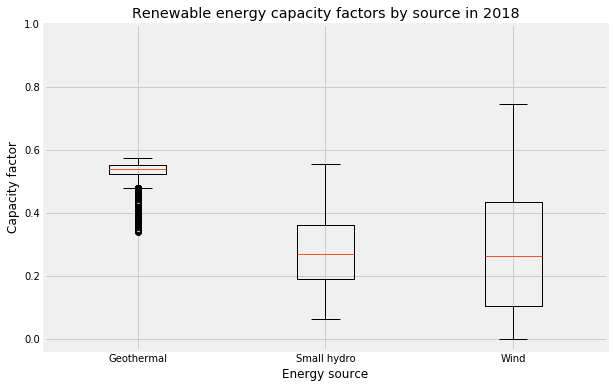

In [24]:
# solution
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot(renewables_2018[["GEOTHERMAL", "SMALL HYDRO", "WIND TOTAL"]].values/
            [1785, 1229, 6714]);
ax.set_xticklabels(["Geothermal", "Small hydro", "Wind"])
plt.xlabel("Energy source")
plt.ylabel("Capacity factor")
plt.ylim(top = 1)
plt.title("Renewable energy capacity factors by source in 2018")
plt.show()

### Question 3.14
Do you notice anything new from the normalized box and whisker plot?

*Your answer here*

### Question 3.15
Now, using the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.violinplot.html) for `plt.violinplot()`, plot the energy generation for geothermal, small hydro, and wind energy, normalized by capacity, side by side. The syntax for axis labeling in this section is very similar to that used with plt.boxplot(). <br>

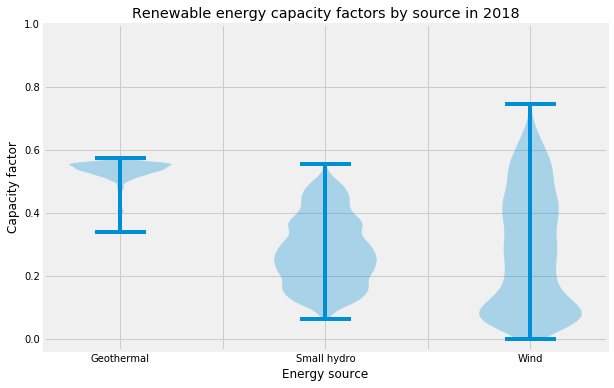

In [25]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.violinplot(renewables_2018[["GEOTHERMAL", "SMALL HYDRO", "WIND TOTAL"]].values/
            [1785, 1229, 6714])
ax.set_xticklabels(["", "Geothermal", "", "Small hydro", "", "Wind"])
plt.xlabel("Energy source")
plt.ylabel("Capacity factor")
plt.ylim(top = 1)
plt.title("Renewable energy capacity factors by source in 2018")
plt.show()

### Question 3.16
The above two plots allow you to compare the distributions of energy generation by resource. What are the similarities and/or differences between the three distributions?

*Your answer here*

### Question 3.17
Compare and contrast the four different types of plots above (histograms, KDE plots, box plots and violin plots), discussing the pros and cons of each of them. What can you see in one type of plot that you can't see in the others? In what situations would use you use one type of plot over another?

Example answers: 
- Histogram: easy to see skewness, though perhaps not as easily as a KDE. 
- KDE: great way to get an understanding of probability density at a glance, but can be skewed by outliers, and can look very different depending on parameters
- Box Plot: easy to see median/IQR/outliers, but information is lost within boxplot, etc.
- Violin Plot: great combination of box/prob dens, but skewed by outliers

<br>

---

## Section 4: Scatter Plots<a id='scatter'></a>

In this section, we will look at renewable energy generation trends over time using scatter plots.<br>

### Question 4.1
Create a scatter plot that shows the date on the x-axis, and the total renewable energy generation (i.e. the sum of generation values at each time period for each energy source) on the y-axis.Make sure to label the title and axes, and make sure the y-axis starts at 0. You can find the documentation for plt.scatter() [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). You can also play around with the marker colour and size to get a plot that looks better than the default layout. 

*Hint*: use `df.index` to get the date values from the index, and the method `.sum(axis=1)` to get the sum of each row.

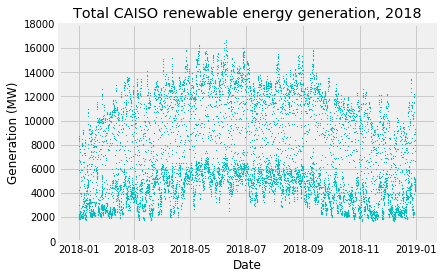

In [26]:
# solution
plt.scatter(renewables_2018.index, renewables_2018.iloc[:,1:].sum(axis=1), s = 0.5, color = 'c')
plt.title("Total CAISO renewable energy generation, 2018")
plt.xlabel("Date")
plt.ylabel("Generation (MW)")
plt.ylim(0,18000)
plt.show()

### Question 4.2
In this section, you get to plot a scatter plot of your choice using this assignment's renewable energy generation data. The only restrictions are that your plot should show at least two different series (i.e. two separate sets of data).<br>

If you want an idea of where to get started, you can try plotting generation values for different resrouces as a function of date, or thinking of different ways to summarize the generation data (eg. you could find daily generation means).<br>

As always, make sure to add a title and axis labels, and set the y- and x-axis range to values that make sense for the plot. You should also choose an appropriate color scheme and other design elements (like marker size or shape).<br>

In the markdown cell below, provide a 1-3 sentence justification of your choice of data and design elements. What are you trying to convey, and how did you format your plot to convey that message?

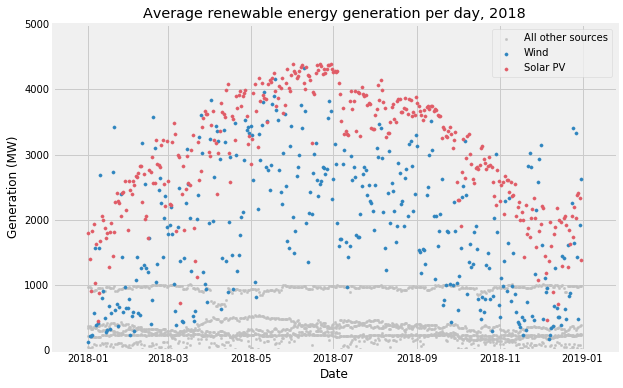

In [27]:
# one possible approach
means = renewables_2018.groupby(renewables_2018.index).mean()

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

for i in range(1,len(means.columns)):
    color = 'silver'
    label = None
    size = 5
    if means.columns[i] == "SOLAR PV":
        color = '#E05C67'
        label = 'Solar PV'
        size = 10
    elif means.columns[i] == "WIND TOTAL":
        color = '#2F85BF'
        label = 'Wind'
        size = 10
    elif means.columns[i] == "GEOTHERMAL":
        label = 'All other sources'
    ax.scatter(means.index, means.iloc[:,i], s = size, label = label, color = color)
    
plt.title("Average renewable energy generation per day, 2018")
plt.xlabel("Date")
plt.ylabel("Generation (MW)")
plt.ylim(0,5000)
plt.legend()
plt.show()

When I plotted the data with a different colour for each source, I found that only wind and solar PV really varied with time and were also driving the trend in increasing renewable generation in the summer. I decided to highlight those two resources so that their trend in generation was apparent, and grey out all other renewable sources.

----

## Section 5: Project<a id='project'></a>

Who will you be working with on the project? Enter first + last names of all your group members below.

*Your answer here*

What prediction questions will your group be exploring? This can be preliminary - it's ok (and expected) if it changes and becomes more refined throughout the next few weeks. Write down at least two.  Make it clear that you're posing prediction problems, not inference problems. 

*Your answer here*

What data sources will you be using? Try to find $1+N_{s}$ relevant data sources, where $N_{s}$ is the number of students in your group. Insert a link to and a brief description of each dataset below.

*Your answer here*

----

## Submission

Congrats, you're done with homework 4!

Before you submit, click **Kernel** --> **Restart & Clear Output**. Then, click **Cell** --> **Run All**. Then, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file **as both an .html and .ipynb file through bCourses**.

----

## Bibilography
+ CAISO - Renewables Reporting Data. http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx
+ Seaborn - Distplot. https://seaborn.pydata.org/generated/seaborn.distplot.html
+ Matplotlib. https://matplotlib.org
+ Knowledge Stockpile - Creating boxplots with Matplotlib. http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

<hr/>
Notebook developed by: Rebekah Tang

Data Science Modules: http://data.berkeley.edu/education/modules